# 3. **Elasticidad del Precio**
**Resumen:** El análisis de elasticidad precio-demanda permite evaluar cómo los cambios en los precios afectan la demanda de aguacates. Comprender la elasticidad puede ayudar a formular estrategias de precios más efectivas.

La fórmula de elasticidad precio-demanda es:

$$
E_d = \frac{\% \text{Cambio en la cantidad demandada}}{\% \text{Cambio en el precio}} = \frac{\Delta Q / Q}{\Delta P / P}
$$

# Introducción

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])

In [5]:
region_classification = {
'Albany': 'City',
'Atlanta': 'City',
'BaltimoreWashington': 'Region',
'Boise': 'City',
'Boston': 'City',
'BuffaloRochester': 'Region',
'California': 'GreaterRegion',
'Charlotte': 'City',
'Chicago': 'City',
'CincinnatiDayton': 'Region',
'Columbus': 'City',
'DallasFtWorth': 'Region',
'Denver': 'City',
'Detroit': 'City',
'GrandRapids': 'City',
'GreatLakes': 'GreaterRegion',
'HarrisburgScranton': 'Region',
'HartfordSpringfield': 'Region',
'Houston': 'City',
'Indianapolis': 'City',
'Jacksonville': 'City',
'LasVegas': 'City',
'LosAngeles': 'City',
'Louisville': 'City',
'MiamiFtLauderdale': 'Region',
'Midsouth': 'GreaterRegion',
'Nashville': 'City',
'NewOrleansMobile': 'Region',
'NewYork': 'City',
'Northeast': 'GreaterRegion',
'NorthernNewEngland': 'Region',
'Orlando': 'City',
'Philadelphia': 'City',
'PhoenixTucson': 'Region',
'Pittsburgh': 'City',
'Plains': 'GreaterRegion',
'Portland': 'City',
'RaleighGreensboro': 'Region',
'RichmondNorfolk': 'Region',
'Roanoke': 'City',
'Sacramento': 'City',
'SanDiego': 'City',
'SanFrancisco': 'City',
'Seattle': 'City',
'SouthCarolina': 'Region',
'SouthCentral': 'GreaterRegion',
'Southeast': 'GreaterRegion',
'Spokane': 'City',
'StLouis': 'City',
'Syracuse': 'City',
'Tampa': 'City',
'TotalUS': 'TotalUS',
'West': 'GreaterRegion',
'WestTexNewMexico': 'Region'
}

classification_colors = {'City':'green' ,'Region':'yellow' ,'GreaterRegion':'orange', 'State':'red', 'TotalUS': 'blue'}

df_cp['region_class']= df_cp['region'].map(region_classification)

In [6]:
df_cp = df_cp.rename(columns={df.columns[0]: 'Col_0'}) # Primera columna sin titulo, potencialmente eliminable
df_cp = df_cp.rename(columns={'4046': 'Volume_Hass_S'}) # Etiquetas mas descritivas
df_cp = df_cp.rename(columns={'4225': 'Volume_Hass_L'})
df_cp = df_cp.rename(columns={'4770': 'Volume_Hass_XL'})
df_cp = df_cp.drop('Col_0', axis=1) # Parecen IDs del 0 al 52. Eliminable. # Col_0 = df_cp['Col_0'].unique()  print(f"Col_0: {Col_0}\n")

df_convencional = df_cp[df_cp['type'] == 'conventional']
# df_cp_cleaned = df_cp[df_cp.region != 'TotalUS'] # Para seleccionar unicamente las regiones propias , descartamos Total US para la vista gráfica

# Ejercicios tal qual se piden

## 1. **Elasticidad Precio-Demanda por Año:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda para cada año.
     - Calcula la variación porcentual de `Total Volume` y `AveragePrice` utilizando `pd.pct_change()`.
     - Utiliza la fórmula de elasticidad para determinar la sensibilidad de la demanda respecto al precio.
     - Presenta los resultados en un gráfico de líneas usando `plt.plot()` para mostrar la elasticidad por año.

Descibiendo el problema, al calcular la elasticidad no solo aparece un nan al inicio (Que es lo de menos), sino que aparecen infinitos y menos infinitos que hay que tratar

In [103]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_cp_elast_year = df_cp_elast.sort_values(by=['region','type', 'year'])


# # Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_cp_elast_year['Elasticity'] = df_cp_elast_year['Total Volume'].pct_change() /  df_cp_elast_year['AveragePrice'].pct_change()

# # Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
df_cp_elast_year =df_cp_elast_year[-df_cp_elast_year['Elasticity'].isin([-np.inf,np.inf])]
df_cp_elast_year = df_cp_elast_year.loc[1:,:]

Text(0.5, 1.0, 'Sorted year elasticity')

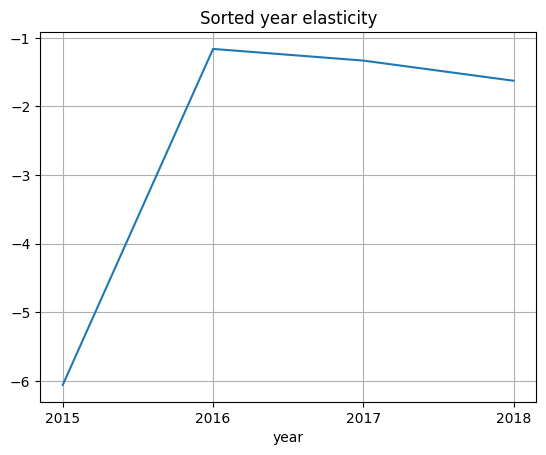

In [51]:
# Creem el group by adient
yearly_elasticity_sort = df_cp_elast_year.loc[1:,:].groupby("year").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
yearly_elasticity_sort.loc[:,'Elasticity'].plot(kind = 'line',ax= ax )
ax.set_xticks(yearly_elasticity_sort.index)
ax.grid()
# plt.ylim(-7.5,2.5)
plt.title('Sorted year elasticity')

Text(0.5, 1.0, 'Sorted year elasticity')

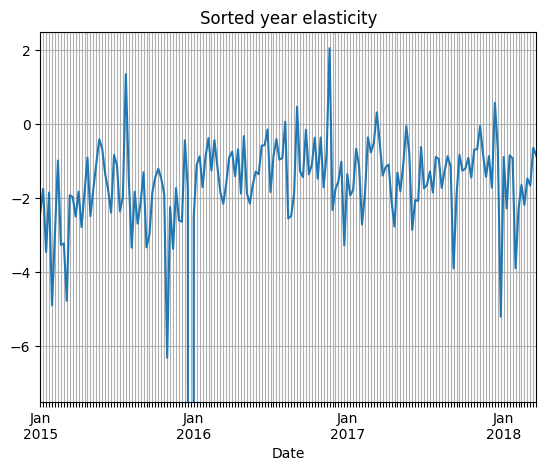

In [52]:
# Creem el group by adient
yearly_elasticity_sort = df_cp_elast_year.loc[1:,:].groupby("Date").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
yearly_elasticity_sort.loc[:,'Elasticity'].plot(kind = 'line',ax= ax )
ax.set_xticks(yearly_elasticity_sort.index)
ax.grid()
plt.ylim(-7.5,2.5)
plt.title('Sorted year elasticity')

# yearly_elasticity_sort

## 2. **Comparación de Elasticidad en Diferentes Mercados:**
   - **Uso de Datos:** Utiliza las columnas `Total Volume` y `AveragePrice`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda en diferentes regiones.
     - Agrupa los datos por `region` y calcula la elasticidad para cada región utilizando `pd.pct_change()`.
     - Presenta un gráfico de barras que muestre la elasticidad por región usando `plt.bar()`.

In [9]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_elast_sort = df_cp_elast.sort_values(by=['region', 'type', 'year'])


# # Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_elast_sort['Elasticity'] = df_elast_sort['Total Volume'].pct_change() /  df_elast_sort['AveragePrice'].pct_change()

# # Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
df_elast_sort =df_elast_sort[-df_elast_sort['Elasticity'].isin([-np.inf,np.inf])]
df_elast_sort = df_elast_sort.loc[1:,:]
df_elast_sort

,Date,AveragePrice,Total Volume,Volume_Hass_S,Volume_Hass_L,Volume_Hass_XL,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,region_class,Elasticity
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,City,-9.689427
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,City,-3.710176
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,City,-2.057296
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,City,-1.910871
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,City,-6.194632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,Region,1.781953
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,Region,-3.802723
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,Region,-0.093331
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,Region,5.520447


Text(0.5, 1.0, 'Sorted region elasticity')

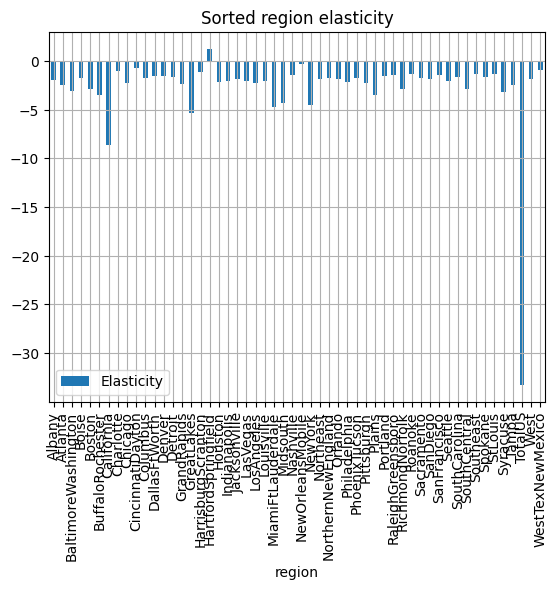

In [54]:
# Creem el group by adient
region_elasticity_sort = df_elast_sort.loc[1:,:].groupby("region").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
region_elasticity_sort.plot(kind = 'bar',ax= ax )
# ax.set_xticks(region_elasticity_sort.index)
ax.grid()
plt.title('Sorted region elasticity')

Text(0.5, 1.0, 'Sorted region elasticity')

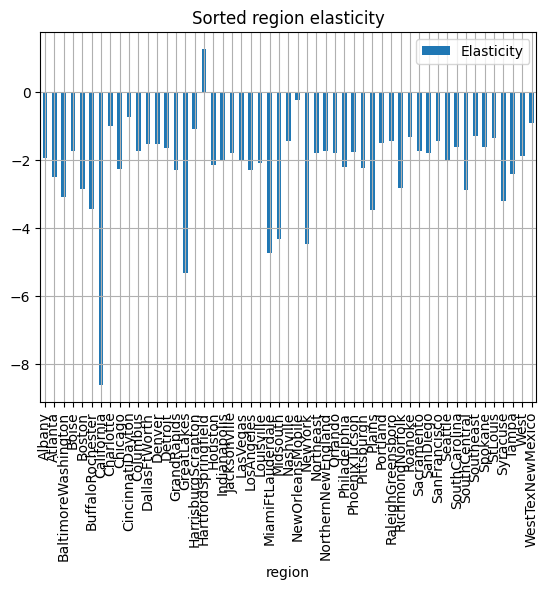

In [55]:
# Creem el group by adient
# [df_elast_sort.region != 'TotalUS']
region_elasticity_sort = df_elast_sort.loc[1:,:].groupby("region").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
region_elasticity_sort.plot(kind = 'bar',ax= ax )
# ax.set_xticks(region_elasticity_sort.index)
ax.grid()
plt.title('Sorted region elasticity')

## 3. **Elasticidad a Nivel de Tipo de Bolsa:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Bags`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda específica para cada tipo de bolsa.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `groupby()` y `sum()`.
     - Calcula la elasticidad para cada tipo y presenta los resultados en un gráfico comparativo usando `plt.bar()`.

In [47]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast_bags = df_cp.copy().sort_values(by=['region', 'year'])

df_cp_elast_bags['Small bag elasticity']= df_cp_elast_bags['Small Bags'].pct_change() /  df_cp_elast_bags['AveragePrice'].pct_change()
df_cp_elast_bags['Large bag elasticity']= df_cp_elast_bags['Large Bags'].pct_change() /  df_cp_elast_bags['AveragePrice'].pct_change()
df_cp_elast_bags['XLarge bag elasticity']= df_cp_elast_bags['XLarge Bags'].pct_change() /  df_cp_elast_bags['AveragePrice'].pct_change()

# # Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
df_cp_elast_bags =df_cp_elast_bags[-df_cp_elast_bags['Small bag elasticity'].isin([-np.inf,np.inf])]
df_cp_elast_bags =df_cp_elast_bags[-df_cp_elast_bags['Large bag elasticity'].isin([-np.inf,np.inf])]
df_cp_elast_bags =df_cp_elast_bags[-df_cp_elast_bags['XLarge bag elasticity'].isin([-np.inf,np.inf])]

df_cp_elast_bags = df_cp_elast_bags.loc[1:,:]

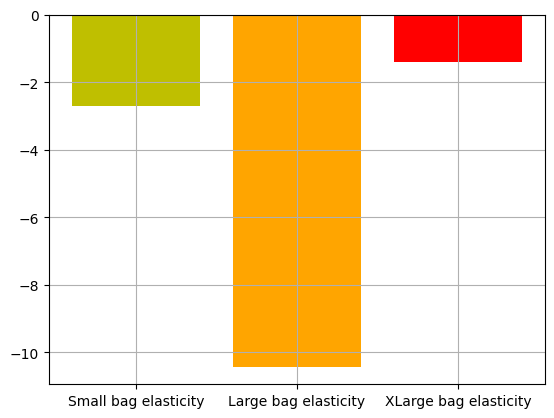

In [46]:
bag_means = df_cp_elast_bags.loc[:,['Small bag elasticity','Large bag elasticity','XLarge bag elasticity']].mean()

labels= ['Small bag elasticity','Large bag elasticity','XLarge bag elasticity']

plt.bar(x=labels, height = bag_means, color = ('y', 'orange', 'r'))
plt.grid()

## 4. **Análisis de Elasticidad Comparativa entre Orgánicos y Convencionales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `type`.
   - **Esperado:** Compara la elasticidad de la demanda entre aguacates orgánicos y convencionales.
     - Agrupa los datos por `type` y calcula la elasticidad utilizando `pd.pct_change()`.
     - Presenta un gráfico que muestre la diferencia en elasticidad entre los dos tipos usando `plt.bar()`.

In [71]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_elast_sort = df_cp_elast.sort_values(by=['region','type', 'Date'])


# # Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_elast_sort['Elasticity'] = df_elast_sort['Total Volume'].pct_change() /  df_elast_sort['AveragePrice'].pct_change()

# # Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
df_elast_sort =df_elast_sort[-df_elast_sort['Elasticity'].isin([-np.inf,np.inf])]
df_elast_sort = df_elast_sort.loc[1:,:]

Text(0.5, 1.0, 'Sorted type elasticity')

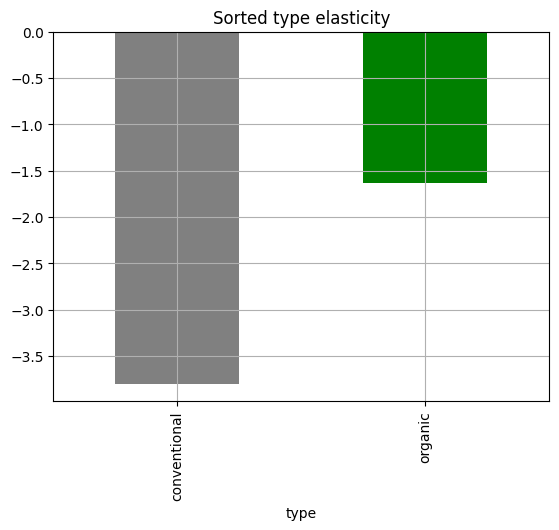

In [72]:
# Creem el group by adient
type_elasticity_sort = df_elast_sort.loc[1:,:].groupby("type").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
type_elasticity_sort.loc[:,'Elasticity'].plot(kind = 'bar',ax= ax, color = ['gray','green'])
# ax.set_xticks(region_elasticity_sort.index)
ax.grid()
plt.title('Sorted type elasticity')

## 5. **Análisis de la Elasticidad Precios-Ventas:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Examina cómo las variaciones en `AveragePrice` afectan a `Total Volume`.
     - Realiza un análisis de la relación entre estas dos variables calculando la elasticidad.
     - Presenta un gráfico de dispersión que muestre la relación y discute la tendencia observada utilizando `plt.scatter()` y `plt.plot()`.

Text(0.5, 1.0, 'Sorted year elasticity')

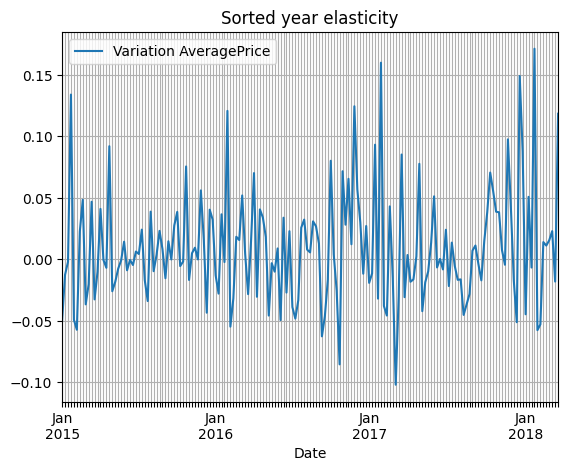

In [92]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_elast_sort = df_cp_elast.sort_values(by=['region','type', 'year'])

# Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_elast_sort['Variation Total Volume'] = df_elast_sort['Total Volume'].pct_change()   
df_elast_sort['Variation AveragePrice'] = df_elast_sort['AveragePrice'].pct_change()

df_elast_sort = df_elast_sort.loc[1:,:]

# Creem el group by adient
yearly_elasticity_sort = df_elast_sort.groupby("Date").agg({'Variation AveragePrice':"mean"})

#Plotejem
fig, ax = plt.subplots()
yearly_elasticity_sort.plot(kind = 'line',ax= ax )
ax.set_xticks(yearly_elasticity_sort.index)
ax.grid()
# plt.ylim(-7.5,2.5)
plt.title('Sorted year elasticity')

# yearly_elasticity_sort

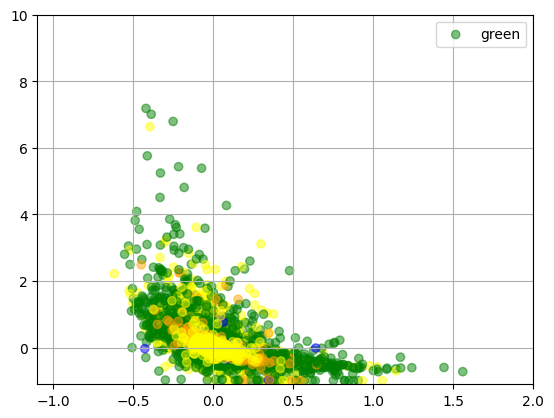

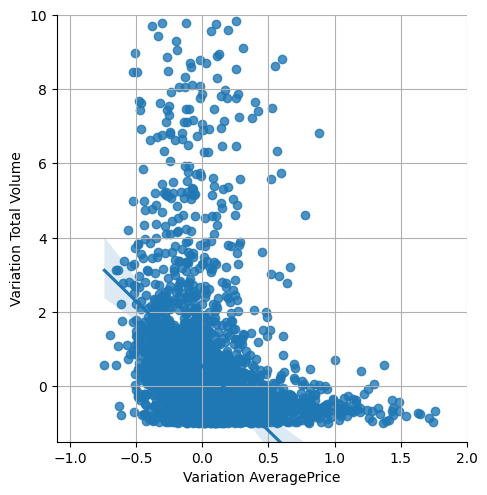

In [96]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_elast_sort = df_cp_elast.sort_values(by=['region','type', 'year'])

# Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_elast_sort['Variation Total Volume'] = df_elast_sort['Total Volume'].pct_change()   
df_elast_sort['Variation AveragePrice'] = df_elast_sort['AveragePrice'].pct_change()

df_elast_sort = df_elast_sort.loc[1:,:]


y_values= df_elast_sort.loc[1:,'Variation Total Volume']
x_values= df_elast_sort.loc[1:,'Variation AveragePrice']
z_values= df_elast_sort.loc[1:,'region_class'].map(classification_colors)


fig, ax = plt.subplots( )
ax.scatter(x=x_values,y= y_values, c=z_values, alpha=0.5)#.map(coloring_alcovados)
plt.ylim(-1.1,10)
plt.xlim(-1.1,2)
ax.grid()
plt.legend(z_values)
plt.show()

import seaborn as sns
sns.lmplot(x='Variation AveragePrice',y='Variation Total Volume',data=df_cp_elast_year,fit_reg=True)
plt.ylim(-1.5,10)
plt.xlim(-1.1,2)
plt.grid()
plt.show()

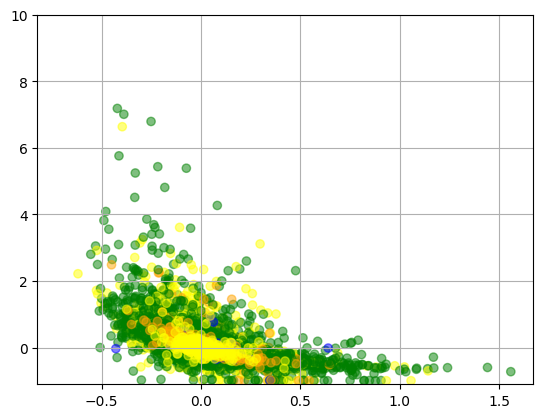

In [87]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_elast_sort = df_cp_elast.sort_values(by=['region','type', 'year'])

# Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_elast_sort['Variation Total Volume'] = df_elast_sort['Total Volume'].pct_change()   
df_elast_sort['Variation AveragePrice'] = df_elast_sort['AveragePrice'].pct_change()

df_elast_sort = df_elast_sort.loc[1:,:]


y_values= df_elast_sort.loc[1:,'Variation Total Volume']
x_values= df_elast_sort.loc[1:,'Variation AveragePrice']
z_values= df_elast_sort.loc[1:,'region_class'].map(classification_colors)

fig, ax = plt.subplots( )
ax.scatter(x=x_values,y= y_values, c=z_values, alpha=0.5)
plt.ylim(-1.1,10)
# plt.xlim(-1.1,2)
ax.grid()
plt.show()


# Further studies

Els apartats anteriors han mostrat tendencies claras, pero encara aixi es complicat separar els efectes de convergencia de múltiples variables. Es per això que tractarem de fer subsets per a veure els efectes mes clars.

Addicionalment tractarem de fer els càlculs d'elasticitat un cop fetes les separacions en el df

## 2.1. Elasticidad Sobre el tiempo (Conventional USA)

In [106]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_sort = df_cp_elast.sort_values(by=['region','type', 'year'])

df_USA = df_sort[df_sort['region']=='TotalUS']

df_USA_conv = df_USA[df_USA['type']=='conventional'].copy()
df_USA_conv['Elasticity'] = df_USA_conv['Total Volume'].pct_change() /  df_USA_conv['AveragePrice'].pct_change()
df_USA_conv =df_USA_conv[-df_USA_conv['Elasticity'].isin([-np.inf,np.inf])]

df_USA_organic = df_USA[df_USA['type']=='organic'].copy()
df_USA_organic['Elasticity'] = df_USA_organic['Total Volume'].pct_change() /  df_USA_organic['AveragePrice'].pct_change()
df_USA_organic =df_USA_organic[-df_USA_organic['Elasticity'].isin([-np.inf,np.inf])]

Text(0.5, 1.0, 'Sorted year elasticity')

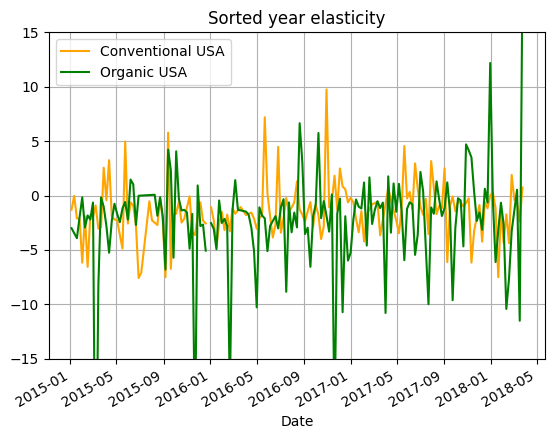

In [127]:
# Creem el group by adient
USA_conv_year = df_USA_conv.loc[1:,:].groupby("Date").agg({'Elasticity':"mean"})
USA_org_year = df_USA_organic.loc[1:,:].groupby("Date").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
USA_conv_year.loc[:,'Elasticity'].plot(kind = 'line',ax= ax, label= 'Conventional USA', color = 'orange' )
USA_org_year.loc[:,'Elasticity'].plot(kind = 'line',ax= ax, label= 'Organic USA', color = 'green' )
# ax.set_xticks(USA_conv_year.index)
ax.grid()
plt.legend()
plt.ylim(-15,15)
plt.title('Sorted year elasticity')

Text(0.5, 1.0, 'Sorted type elasticity')

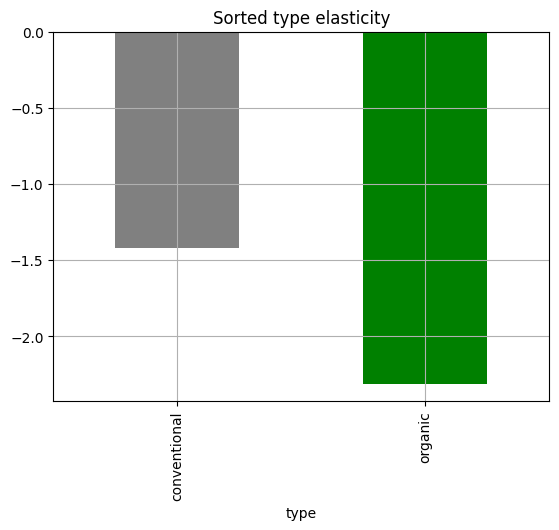

In [143]:
# Creem el group by adient
df_USA_temp = df_USA.copy()
df_USA_temp['Elasticity'] = df_USA_temp['Total Volume'].pct_change() /  df_USA_temp['AveragePrice'].pct_change()
df_USA_temp =df_USA_temp[-df_USA_temp['Elasticity'].isin([-np.inf,np.inf])]

type_elasticity_sort = df_USA_temp.loc[1:,:].groupby("type").agg({'Elasticity':"mean"})

type_elasticity_sort

#Plotejem
fig, ax = plt.subplots()
type_elasticity_sort.loc[:,'Elasticity'].plot(kind = 'bar',ax= ax, color = ['gray','green'])
# ax.set_xticks(region_elasticity_sort.index)
ax.grid()
plt.title('Sorted type elasticity')

Text(0.5, 1.0, 'Sorted year elasticity')

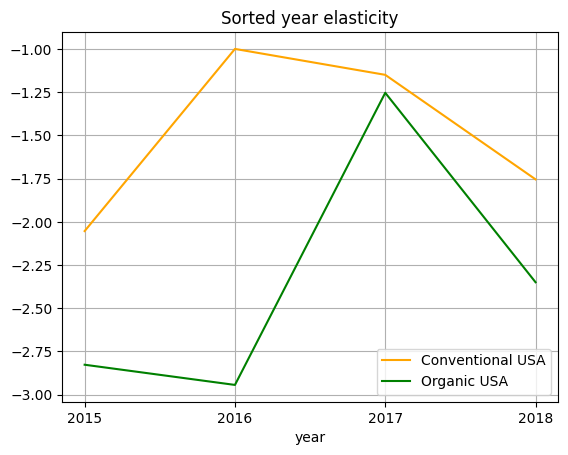

In [128]:
# Creem el group by adient
USA_conv_year = df_USA_conv.loc[1:,:].groupby("year").agg({'Elasticity':"mean"})
USA_org_year = df_USA_organic.loc[1:,:].groupby("year").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
USA_conv_year.loc[:,'Elasticity'].plot(kind = 'line',ax= ax, label= 'Conventional USA', color = 'orange' )
USA_org_year.loc[:,'Elasticity'].plot(kind = 'line',ax= ax, label= 'Organic USA', color = 'green' )
ax.set_xticks(USA_conv_year.index)
ax.grid()
ax.legend()
# plt.ylim(-7.5,2.5)
plt.title('Sorted year elasticity')

## 2.2. Elasticidad por Regiones, harémos por regiones mas grandes y en funcion del tiempo. Solo convencionales.

Text(0.5, 1.0, 'Sorted year elasticity')

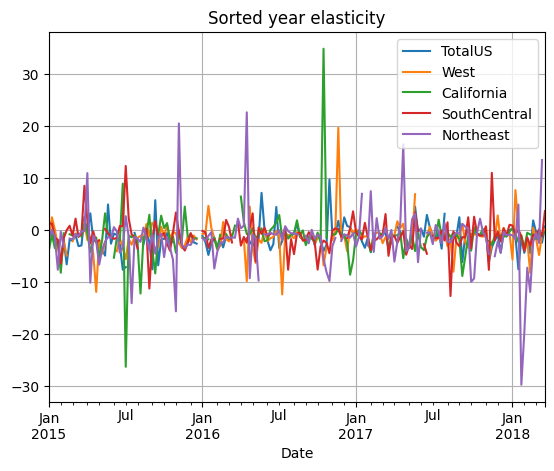

In [139]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()
region_largest= df_sort.groupby('region')['Total Volume'].sum().nlargest(5).index

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_sort = df_cp_elast.sort_values(by=['region','type', 'year'])
df_sort_conv = df_sort[df_sort['type'] == 'conventional'].copy()

fig, ax= plt.subplots()
for region in region_largest:

    region_subset = df_sort_conv[  df_sort_conv['region']== region ].copy()
    region_subset['Elasticity'] = region_subset['Total Volume'].pct_change() /  region_subset['AveragePrice'].pct_change()
    temp_groupby = region_subset.loc[1:,:].groupby('Date').agg({'Elasticity':"mean"})

    temp_groupby.loc[:,'Elasticity'].plot(kind = 'line', label = region, ax=ax)

ax.grid()
ax.legend()
# plt.ylim(-15,15)
plt.title('Sorted year elasticity')



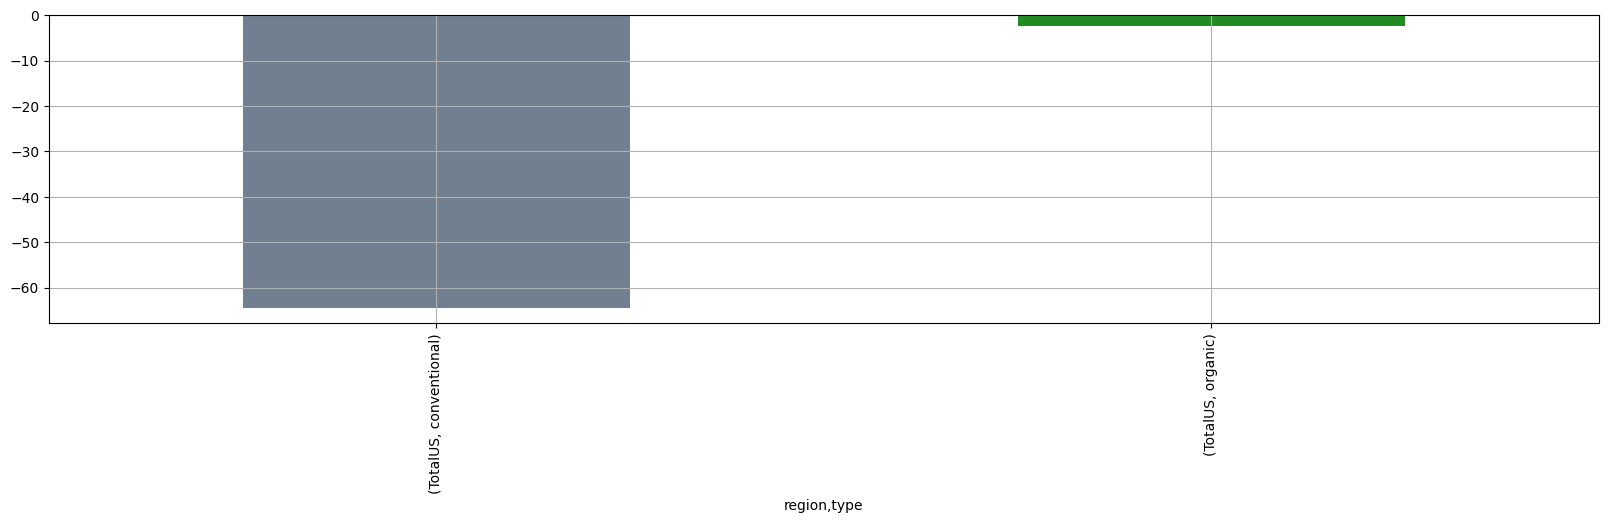

In [8]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_elast_sort = df_cp_elast.sort_values(by=['region','type', 'year'])


# # Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_elast_sort['Elasticity'] = df_elast_sort['Total Volume'].pct_change() /  df_elast_sort['AveragePrice'].pct_change()

# # Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
df_elast_sort =df_elast_sort[-df_elast_sort['Elasticity'].isin([-np.inf,np.inf])]
df_elast_sort = df_elast_sort.loc[1:,:]

#######################################################################################################################
df_elast_sort= df_elast_sort[df_elast_sort['region']=='TotalUS']
avocados_elasticity_mean = df_elast_sort.groupby(['region','type'])['Elasticity'].mean()#.nlargest(6)

avocados_elasticity_mean

fig, ax= plt.subplots(figsize=(20,4))
# avocados_relative_mean = (avocados_region_mean - total_mean)*100/total_mean
avocados_elasticity_mean.plot(kind = 'bar', color = ['slategray', 'forestgreen'])
plt.grid()

# Otros

## Prueba USA

In [ ]:
##Veig coses molt rares per a total US. Probem 

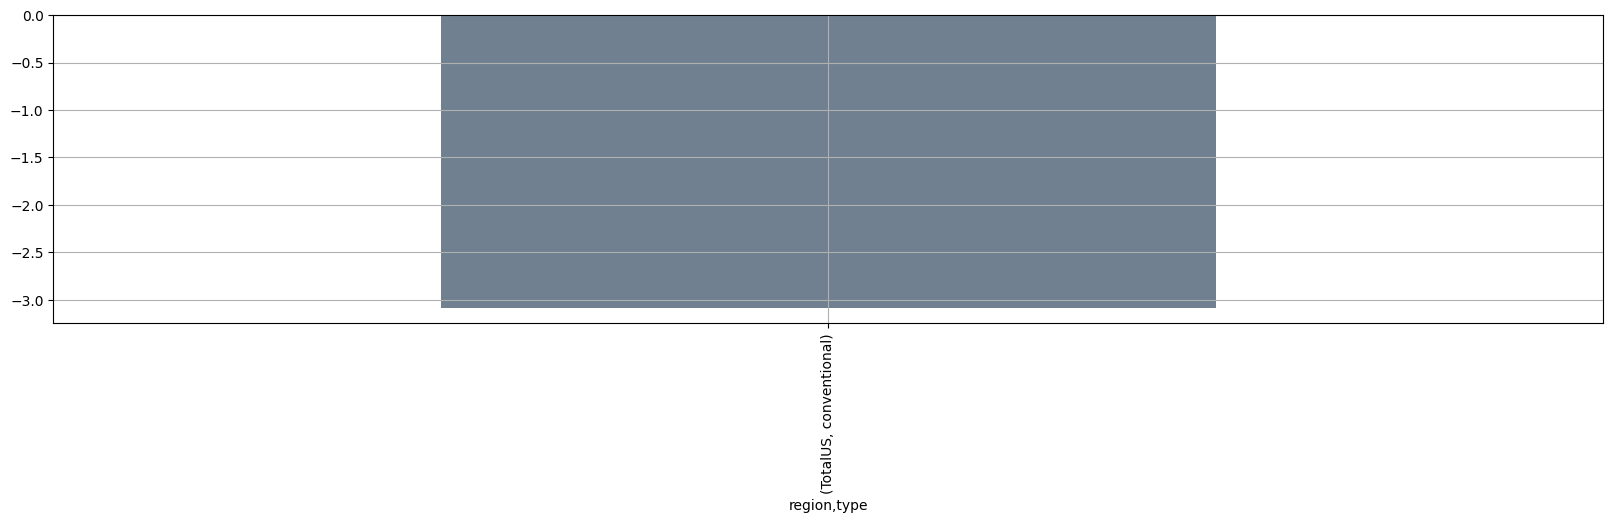

In [55]:
######### Calculo por cada region
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

df_cp_elast = df_cp_elast[df_cp_elast['type'] == 'conventional']

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_elast_sort = df_cp_elast.sort_values(by=['region','type', 'Date'])


# # Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_elast_sort['Elasticity'] = df_elast_sort['Total Volume'].pct_change() /  df_elast_sort['AveragePrice'].pct_change()

# # Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
df_elast_sort =df_elast_sort[-df_elast_sort['Elasticity'].isin([-np.inf,np.inf])]
df_elast_sort = df_elast_sort.loc[1:,:]

#######################################################################################################################
df_elast_sort= df_elast_sort[df_elast_sort['region']=='TotalUS']

avocados_elasticity_mean = df_elast_sort.groupby(['region','type'])['Elasticity'].mean()#.nlargest(6)

fig, ax= plt.subplots(figsize=(20,4))
# avocados_relative_mean = (avocados_region_mean - total_mean)*100/total_mean
avocados_elasticity_mean.plot(kind = 'bar', color = ['slategray', 'forestgreen'])
plt.grid()

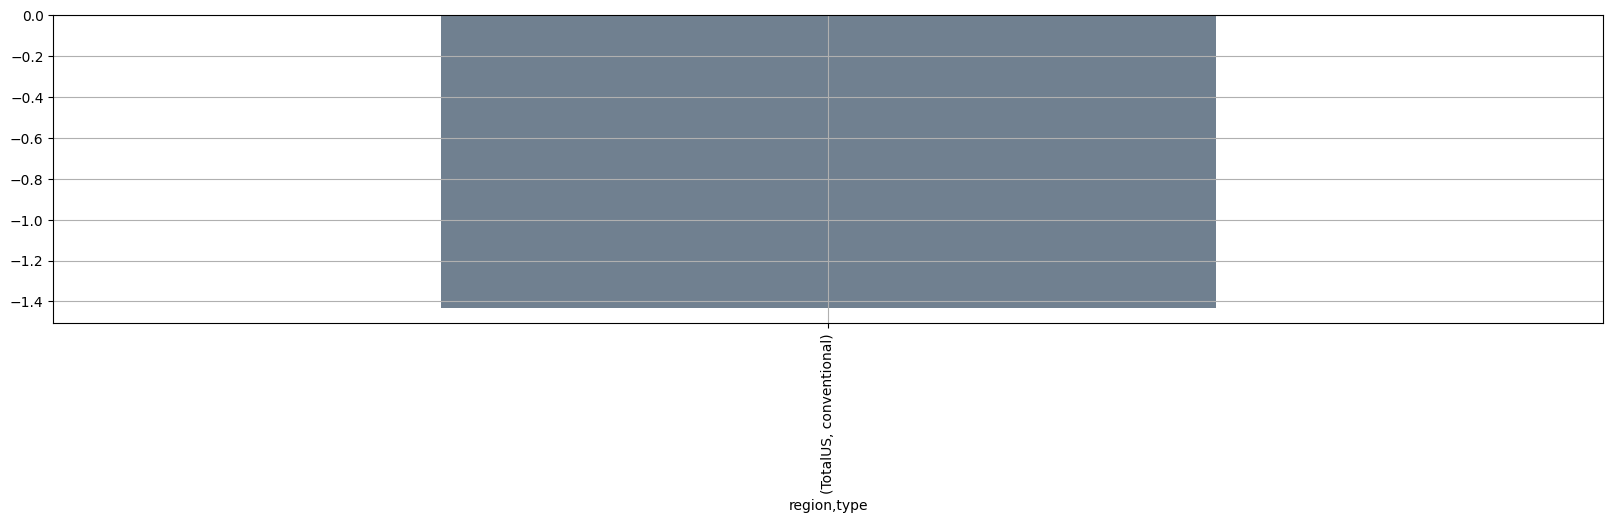

In [50]:
######### Calculo por cada region
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

df_cp_elast = df_cp_elast[df_cp_elast['type'] == 'conventional']
df_cp_elast = df_cp_elast[df_cp_elast['region'] == 'TotalUS']

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_elast_sort = df_cp_elast.sort_values(by=['region','type', 'Date']).reset_index()


# # Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_elast_sort['Elasticity'] = df_elast_sort['Total Volume'].pct_change() /  df_elast_sort['AveragePrice'].pct_change()

# # Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
df_elast_sort =df_elast_sort[-df_elast_sort['Elasticity'].isin([-np.inf,np.inf])]
df_elast_sort = df_elast_sort.loc[1:,:]

#######################################################################################################################
# df_elast_sort= df_elast_sort[df_elast_sort['region']=='TotalUS']
avocados_elasticity_mean = df_elast_sort.groupby(['region','type'])['Elasticity'].mean()#.nlargest(6)

avocados_elasticity_mean

fig, ax= plt.subplots(figsize=(20,4))
# avocados_relative_mean = (avocados_region_mean - total_mean)*100/total_mean
avocados_elasticity_mean.plot(kind = 'bar', color = ['slategray', 'forestgreen'])
plt.grid()

## Regiones correctas

In [ ]:
# Ara sabem que hem d'anar amb molta compte a la mesura 

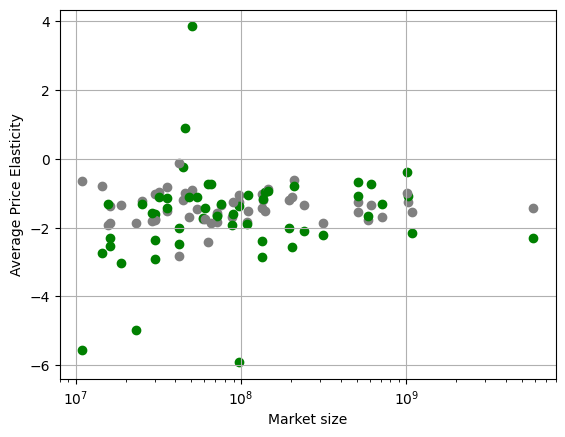

In [31]:
# Aqui podem veure que a majors mercats el preu mig tendeix a abaratirse. Aqui estem prenent cada regio com equivalentment valida
# cambiar el 2018 no parece afectar los resultados
df_cp_elast = df_cp.copy()

df_cp_elast= df_cp_elast.sort_values(by=['region','type', 'year'])

fig, ax=plt.subplots()

for region in pd.unique(df_cp_elast['region']):

    elast_region = df_cp_elast[df_cp_elast['region'] == region].copy()
    temp_market_size= elast_region['Total Volume'].sum()


    conventional_df = elast_region[elast_region['type'] == 'conventional'].copy().reset_index()
    conventional_df['Elasticity'] = conventional_df['Total Volume'].pct_change() /  conventional_df['AveragePrice'].pct_change()
    conventional_df =conventional_df[-conventional_df['Elasticity'].isin([-np.inf,np.inf])]
    
    conv_value = conventional_df.loc[1:,'Elasticity'].mean()

    # display(conventional_df.loc[1:,'Elasticity'])

    # print(conv_value)

    org_df = elast_region[elast_region['type'] == 'organic'].copy().reset_index()
    org_df['Elasticity'] = org_df['Total Volume'].pct_change() /  org_df['AveragePrice'].pct_change()
    org_df =org_df[-org_df['Elasticity'].isin([-np.inf,np.inf])]
    org_value = org_df.loc[1:,'Elasticity'].mean()

    # print(temp_market_size, conv_value, org_value)
    ax.scatter(x=temp_market_size, y= conv_value, color = 'gray')
    ax.scatter(x=temp_market_size, y= org_value, color = 'green')

plt.xscale('log')
plt.ylabel('Average Price Elasticity')
plt.xlabel('Market size')
plt.grid()
plt.show()

# Repetir estudio, pero solo USA

In [40]:
df_USA= df_cp[df_cp['region'] == 'TotalUS'].copy()
df_USA= df_USA.sort_values(by=['Date'])
df_USA_org = df_USA[df_USA['type'] == 'organic'].copy()
df_USA_org['Elasticity'] = df_USA_org['Total Volume'].pct_change() /  df_USA_org['AveragePrice'].pct_change()
df_USA_org =df_USA_org[-df_USA_org['Elasticity'].isin([-np.inf,np.inf])]
df_USA_org = df_USA_org.loc[1:,]


df_USA_conv = df_USA[df_USA['type'] == 'conventional'].copy()
df_USA_conv['Elasticity'] = df_USA_conv['Total Volume'].pct_change() /  df_USA_conv['AveragePrice'].pct_change()
df_USA_conv =df_USA_conv[-df_USA_conv['Elasticity'].isin([-np.inf,np.inf])]
df_USA_conv = df_USA_conv.loc[1:,]

Text(0.5, 1.0, 'Sorted year elasticity')

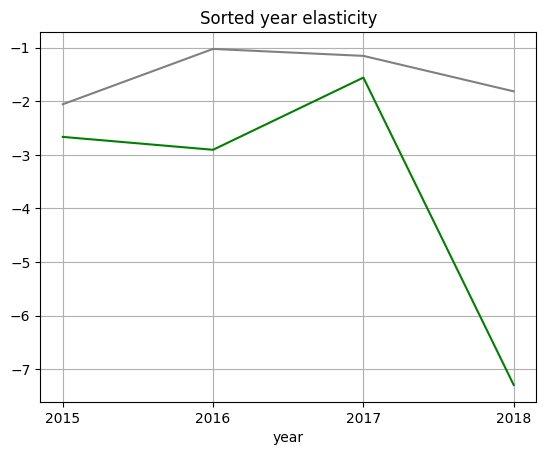

In [41]:
# Creem el group by adient
organic_year_USA = df_USA_org.groupby("year").agg({'Elasticity':"mean"})
conv_year_USA = df_USA_conv.groupby("year").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
organic_year_USA.loc[:,'Elasticity'].plot(kind = 'line',ax= ax, color= 'green' )
conv_year_USA.loc[:,'Elasticity'].plot(kind = 'line',ax= ax, color= 'gray' )
ax.set_xticks(conv_year_USA.index)
ax.grid()
plt.title('Sorted year elasticity')

Text(0.5, 1.0, 'Sorted Date elasticity')

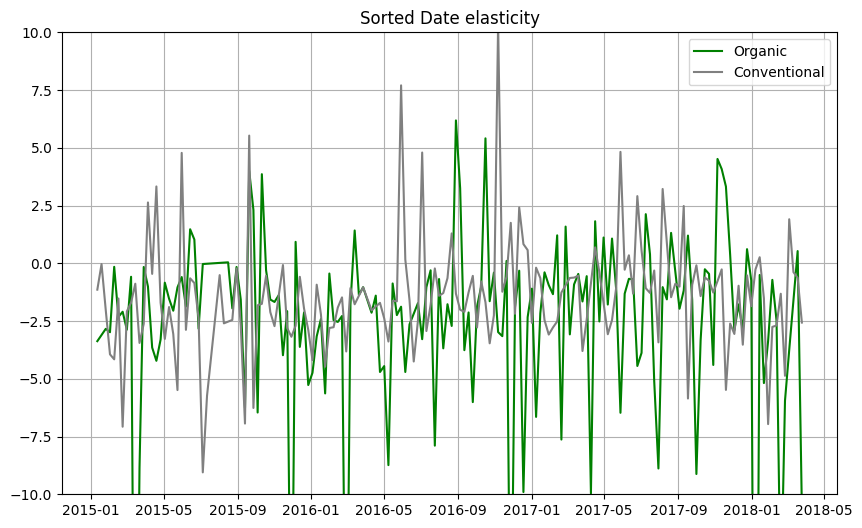

In [46]:
#Plotejem
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(df_USA_org['Date'],  df_USA_org['Elasticity'], color= 'green', label= 'Organic' )
plt.plot(df_USA_conv['Date'],  df_USA_conv['Elasticity'], color= 'Gray', label= 'Conventional' )
# ax.set_xticks(conv_year_USA.index)
ax.grid()
plt.ylim(-10,10)
plt.legend()
plt.title('Sorted Date elasticity')

In [65]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast_bags = df_USA[df_USA['type']=='conventional'].copy().sort_values(by=['region', 'Date']).reset_index()

df_cp_elast_bags['Small bag elasticity']= df_cp_elast_bags['Small Bags'].pct_change() /  df_cp_elast_bags['AveragePrice'].pct_change()
df_cp_elast_bags['Large bag elasticity']= df_cp_elast_bags['Large Bags'].pct_change() /  df_cp_elast_bags['AveragePrice'].pct_change()
df_cp_elast_bags['XLarge bag elasticity']= df_cp_elast_bags['XLarge Bags'].pct_change() /  df_cp_elast_bags['AveragePrice'].pct_change()

# # Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
df_cp_elast_bags =df_cp_elast_bags[-df_cp_elast_bags['Small bag elasticity'].isin([-np.inf,np.inf])]
df_cp_elast_bags =df_cp_elast_bags[-df_cp_elast_bags['Large bag elasticity'].isin([-np.inf,np.inf])]
df_cp_elast_bags =df_cp_elast_bags[-df_cp_elast_bags['XLarge bag elasticity'].isin([-np.inf,np.inf])]

df_cp_elast_bags = df_cp_elast_bags.loc[1:,:]

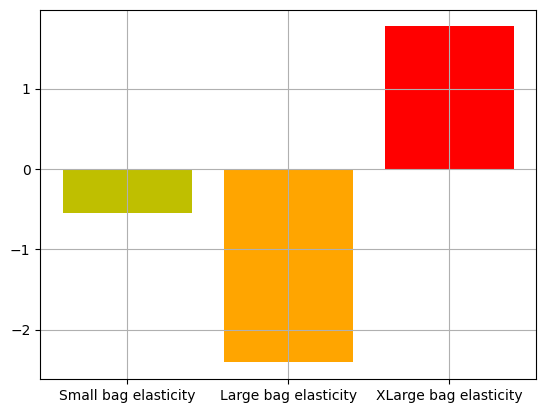

In [66]:
bag_means = df_cp_elast_bags.loc[:,['Small bag elasticity','Large bag elasticity','XLarge bag elasticity']].mean()

labels= ['Small bag elasticity','Large bag elasticity','XLarge bag elasticity']

plt.bar(x=labels, height = bag_means, color = ('y', 'orange', 'r'))
plt.grid()